![](https://i.imgur.com/5rtbtpN.png)

https://www.kaggle.com/datasets/samybaladram/palmers-penguin-dataset-extended

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
df = pd.read_csv(r'C:\Users\nicka\Downloads\palmerpenguins_extended.csv')

In [2]:
df

species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0     Adelie  Biscoe            53.4           17.8              219.0   
1     Adelie  Biscoe            49.3           18.1              245.0   
2     Adelie  Biscoe            55.7           16.6              226.0   
3     Adelie  Biscoe            38.0           15.6              221.0   
4     Adelie  Biscoe            60.7           17.9              177.0   
...      ...     ...             ...            ...                ...   
3425  Gentoo  Biscoe            44.0           20.4              252.0   
3426  Gentoo  Biscoe            54.5           25.2              245.0   
3427  Gentoo  Biscoe            51.4           20.4              258.0   
3428  Gentoo  Biscoe            55.9           20.5              247.0   
3429  Gentoo  Biscoe            43.9           22.9              206.0   

      body_mass_g     sex   diet life_stage health_metrics  year  
0          5687.0  female   fish      adult     overweight  2021  
1          6811.0  female   fish      adult     overweight  2021  
2          5388.0  female   fish      adult     overweight  2021  
3          6262.0  female   fish      adult     overweight  2021  
4          4811.0  female   fish   juvenile     overweight  2021  
...           ...     ...    ...        ...            ...   ...  
3425       6447.0    male  squid      adult        healthy  2025  
3426       6872.0    male  squid      adult        healthy  2025  
3427       7409.0    male  squid      adult     overweight  2025  
3428       6491.0    male  squid      adult        healthy  2025  
3429       6835.0    male  squid      adult        healthy  2025  

[3430 rows x 11 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3430 entries, 0 to 3429
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            3430 non-null   object 
 1   island             3430 non-null   object 
 2   bill_length_mm     3430 non-null   float64
 3   bill_depth_mm      3430 non-null   float64
 4   flipper_length_mm  3430 non-null   float64
 5   body_mass_g        3430 non-null   float64
 6   sex                3430 non-null   object 
 7   diet               3430 non-null   object 
 8   life_stage         3430 non-null   object 
 9   health_metrics     3430 non-null   object 
 10  year               3430 non-null   int64  
dtypes: float64(4), int64(1), object(6)
memory usage: 294.9+ KB


In [4]:
object_cols = df.select_dtypes(include = [object]).columns.tolist()
print(object_cols)
num_cols = df.select_dtypes(include = [np.number]).columns.tolist()
print(num_cols)

['species', 'island', 'sex', 'diet', 'life_stage', 'health_metrics']
['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'year']


In [5]:
df = df[object_cols + num_cols]
df

species  island     sex   diet life_stage health_metrics  bill_length_mm  \
0     Adelie  Biscoe  female   fish      adult     overweight            53.4   
1     Adelie  Biscoe  female   fish      adult     overweight            49.3   
2     Adelie  Biscoe  female   fish      adult     overweight            55.7   
3     Adelie  Biscoe  female   fish      adult     overweight            38.0   
4     Adelie  Biscoe  female   fish   juvenile     overweight            60.7   
...      ...     ...     ...    ...        ...            ...             ...   
3425  Gentoo  Biscoe    male  squid      adult        healthy            44.0   
3426  Gentoo  Biscoe    male  squid      adult        healthy            54.5   
3427  Gentoo  Biscoe    male  squid      adult     overweight            51.4   
3428  Gentoo  Biscoe    male  squid      adult        healthy            55.9   
3429  Gentoo  Biscoe    male  squid      adult        healthy            43.9   

      bill_depth_mm  flipper_length_mm  body_mass_g  year  
0              17.8              219.0       5687.0  2021  
1              18.1              245.0       6811.0  2021  
2              16.6              226.0       5388.0  2021  
3              15.6              221.0       6262.0  2021  
4              17.9              177.0       4811.0  2021  
...             ...                ...          ...   ...  
3425           20.4              252.0       6447.0  2025  
3426           25.2              245.0       6872.0  2025  
3427           20.4              258.0       7409.0  2025  
3428           20.5              247.0       6491.0  2025  
3429           22.9              206.0       6835.0  2025  

[3430 rows x 11 columns]

In [6]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()
df[object_cols] = enc.fit_transform(df[object_cols])
df

species  island  sex  diet  life_stage  health_metrics  bill_length_mm  \
0         0.0     0.0  0.0   0.0         0.0             1.0            53.4   
1         0.0     0.0  0.0   0.0         0.0             1.0            49.3   
2         0.0     0.0  0.0   0.0         0.0             1.0            55.7   
3         0.0     0.0  0.0   0.0         0.0             1.0            38.0   
4         0.0     0.0  0.0   0.0         2.0             1.0            60.7   
...       ...     ...  ...   ...         ...             ...             ...   
3425      2.0     0.0  1.0   3.0         0.0             0.0            44.0   
3426      2.0     0.0  1.0   3.0         0.0             0.0            54.5   
3427      2.0     0.0  1.0   3.0         0.0             1.0            51.4   
3428      2.0     0.0  1.0   3.0         0.0             0.0            55.9   
3429      2.0     0.0  1.0   3.0         0.0             0.0            43.9   

      bill_depth_mm  flipper_length_mm  body_mass_g  year  
0              17.8              219.0       5687.0  2021  
1              18.1              245.0       6811.0  2021  
2              16.6              226.0       5388.0  2021  
3              15.6              221.0       6262.0  2021  
4              17.9              177.0       4811.0  2021  
...             ...                ...          ...   ...  
3425           20.4              252.0       6447.0  2025  
3426           25.2              245.0       6872.0  2025  
3427           20.4              258.0       7409.0  2025  
3428           20.5              247.0       6491.0  2025  
3429           22.9              206.0       6835.0  2025  

[3430 rows x 11 columns]

In [7]:
enc.get_feature_names_out()

array(['species', 'island', 'sex', 'diet', 'life_stage', 'health_metrics'],
      dtype=object)

In [8]:
enc.categories_

[array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object),
 array(['Biscoe', 'Dream', 'Torgensen'], dtype=object),
 array(['female', 'male'], dtype=object),
 array(['fish', 'krill', 'parental', 'squid'], dtype=object),
 array(['adult', 'chick', 'juvenile'], dtype=object),
 array(['healthy', 'overweight', 'underweight'], dtype=object)]

In [9]:
enc.inverse_transform(df[['species','island','sex','diet','life_stage','health_metrics']])

array([['Adelie', 'Biscoe', 'female', 'fish', 'adult', 'overweight'],
       ['Adelie', 'Biscoe', 'female', 'fish', 'adult', 'overweight'],
       ['Adelie', 'Biscoe', 'female', 'fish', 'adult', 'overweight'],
       ...,
       ['Gentoo', 'Biscoe', 'male', 'squid', 'adult', 'overweight'],
       ['Gentoo', 'Biscoe', 'male', 'squid', 'adult', 'healthy'],
       ['Gentoo', 'Biscoe', 'male', 'squid', 'adult', 'healthy']],
      dtype=object)

In [10]:
df

species  island  sex  diet  life_stage  health_metrics  bill_length_mm  \
0         0.0     0.0  0.0   0.0         0.0             1.0            53.4   
1         0.0     0.0  0.0   0.0         0.0             1.0            49.3   
2         0.0     0.0  0.0   0.0         0.0             1.0            55.7   
3         0.0     0.0  0.0   0.0         0.0             1.0            38.0   
4         0.0     0.0  0.0   0.0         2.0             1.0            60.7   
...       ...     ...  ...   ...         ...             ...             ...   
3425      2.0     0.0  1.0   3.0         0.0             0.0            44.0   
3426      2.0     0.0  1.0   3.0         0.0             0.0            54.5   
3427      2.0     0.0  1.0   3.0         0.0             1.0            51.4   
3428      2.0     0.0  1.0   3.0         0.0             0.0            55.9   
3429      2.0     0.0  1.0   3.0         0.0             0.0            43.9   

      bill_depth_mm  flipper_length_mm  body_mass_g  year  
0              17.8              219.0       5687.0  2021  
1              18.1              245.0       6811.0  2021  
2              16.6              226.0       5388.0  2021  
3              15.6              221.0       6262.0  2021  
4              17.9              177.0       4811.0  2021  
...             ...                ...          ...   ...  
3425           20.4              252.0       6447.0  2025  
3426           25.2              245.0       6872.0  2025  
3427           20.4              258.0       7409.0  2025  
3428           20.5              247.0       6491.0  2025  
3429           22.9              206.0       6835.0  2025  

[3430 rows x 11 columns]

In [11]:
df.groupby('year')

In [12]:
df.groupby('year').sum()

species  island    sex   diet  life_stage  health_metrics  \
year                                                              
2021    328.0   227.0  169.0  403.0       391.0           286.0   
2022    601.0   399.0  327.0  723.0       760.0           482.0   
2023    624.0   474.0  347.0  740.0       822.0           511.0   
2024    777.0   546.0  450.0  913.0      1015.0           672.0   
2025    787.0   511.0  411.0  939.0       954.0           642.0   

      bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  
year                                                                 
2021         13729.5         6569.2            73406.0    1701758.0  
2022         24994.9        12222.9           135815.0    3199912.0  
2023         26694.0        12788.7           144016.0    3359027.0  
2024         34456.3        16164.3           182798.0    4275159.0  
2025         32282.6        15528.6           174074.0    4047201.0

In [13]:
df.groupby('year').apply(lambda x:x)

C:\Users\nicka\AppData\Local\Temp\ipykernel_17828\2792557858.py:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df.groupby('year').apply(lambda x:x)


species  island  sex  diet  life_stage  health_metrics  bill_length_mm  \
0         0.0     0.0  0.0   0.0         0.0             1.0            53.4   
1         0.0     0.0  0.0   0.0         0.0             1.0            49.3   
2         0.0     0.0  0.0   0.0         0.0             1.0            55.7   
3         0.0     0.0  0.0   0.0         0.0             1.0            38.0   
4         0.0     0.0  0.0   0.0         2.0             1.0            60.7   
...       ...     ...  ...   ...         ...             ...             ...   
3425      2.0     0.0  1.0   3.0         0.0             0.0            44.0   
3426      2.0     0.0  1.0   3.0         0.0             0.0            54.5   
3427      2.0     0.0  1.0   3.0         0.0             1.0            51.4   
3428      2.0     0.0  1.0   3.0         0.0             0.0            55.9   
3429      2.0     0.0  1.0   3.0         0.0             0.0            43.9   

      bill_depth_mm  flipper_length_mm  body_mass_g  year  
0              17.8              219.0       5687.0  2021  
1              18.1              245.0       6811.0  2021  
2              16.6              226.0       5388.0  2021  
3              15.6              221.0       6262.0  2021  
4              17.9              177.0       4811.0  2021  
...             ...                ...          ...   ...  
3425           20.4              252.0       6447.0  2025  
3426           25.2              245.0       6872.0  2025  
3427           20.4              258.0       7409.0  2025  
3428           20.5              247.0       6491.0  2025  
3429           22.9              206.0       6835.0  2025  

[3430 rows x 11 columns]

In [14]:
df.groupby('year',group_keys=True).apply(lambda x:x)

species  island  sex  diet  life_stage  health_metrics  \
year                                                                
2021 0         0.0     0.0  0.0   0.0         0.0             1.0   
     1         0.0     0.0  0.0   0.0         0.0             1.0   
     2         0.0     0.0  0.0   0.0         0.0             1.0   
     3         0.0     0.0  0.0   0.0         0.0             1.0   
     4         0.0     0.0  0.0   0.0         2.0             1.0   
...            ...     ...  ...   ...         ...             ...   
2025 3425      2.0     0.0  1.0   3.0         0.0             0.0   
     3426      2.0     0.0  1.0   3.0         0.0             0.0   
     3427      2.0     0.0  1.0   3.0         0.0             1.0   
     3428      2.0     0.0  1.0   3.0         0.0             0.0   
     3429      2.0     0.0  1.0   3.0         0.0             0.0   

           bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  year  
year                                                                            
2021 0               53.4           17.8              219.0       5687.0  2021  
     1               49.3           18.1              245.0       6811.0  2021  
     2               55.7           16.6              226.0       5388.0  2021  
     3               38.0           15.6              221.0       6262.0  2021  
     4               60.7           17.9              177.0       4811.0  2021  
...                   ...            ...                ...          ...   ...  
2025 3425            44.0           20.4              252.0       6447.0  2025  
     3426            54.5           25.2              245.0       6872.0  2025  
     3427            51.4           20.4              258.0       7409.0  2025  
     3428            55.9           20.5              247.0       6491.0  2025  
     3429            43.9           22.9              206.0       6835.0  2025  

[3430 rows x 11 columns]

In [15]:
df.groupby('year',group_keys=False).apply(lambda x:x)

species  island  sex  diet  life_stage  health_metrics  bill_length_mm  \
0         0.0     0.0  0.0   0.0         0.0             1.0            53.4   
1         0.0     0.0  0.0   0.0         0.0             1.0            49.3   
2         0.0     0.0  0.0   0.0         0.0             1.0            55.7   
3         0.0     0.0  0.0   0.0         0.0             1.0            38.0   
4         0.0     0.0  0.0   0.0         2.0             1.0            60.7   
...       ...     ...  ...   ...         ...             ...             ...   
3425      2.0     0.0  1.0   3.0         0.0             0.0            44.0   
3426      2.0     0.0  1.0   3.0         0.0             0.0            54.5   
3427      2.0     0.0  1.0   3.0         0.0             1.0            51.4   
3428      2.0     0.0  1.0   3.0         0.0             0.0            55.9   
3429      2.0     0.0  1.0   3.0         0.0             0.0            43.9   

      bill_depth_mm  flipper_length_mm  body_mass_g  year  
0              17.8              219.0       5687.0  2021  
1              18.1              245.0       6811.0  2021  
2              16.6              226.0       5388.0  2021  
3              15.6              221.0       6262.0  2021  
4              17.9              177.0       4811.0  2021  
...             ...                ...          ...   ...  
3425           20.4              252.0       6447.0  2025  
3426           25.2              245.0       6872.0  2025  
3427           20.4              258.0       7409.0  2025  
3428           20.5              247.0       6491.0  2025  
3429           22.9              206.0       6835.0  2025  

[3430 rows x 11 columns]

<Axes: xlabel='year'>

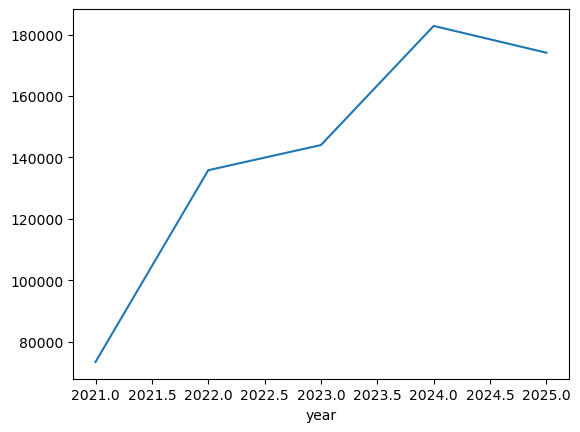

In [16]:
df.groupby('year').sum()['flipper_length_mm'].plot()

{'whiskers': [<matplotlib.lines.Line2D at 0x16a852bff10>,
 'caps': [<matplotlib.lines.Line2D at 0x16a85cd8250>,
 'boxes': [<matplotlib.lines.Line2D at 0x16a84f73e90>],
 'medians': [<matplotlib.lines.Line2D at 0x16a85cd9950>],
 'fliers': [<matplotlib.lines.Line2D at 0x16a85cda450>],
 'means': []}

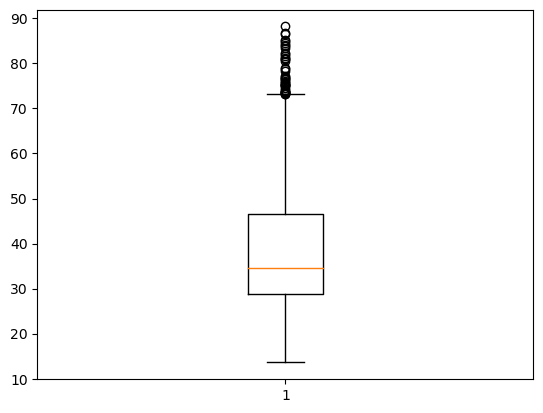

In [17]:
plt.boxplot(df['bill_length_mm'])

(array([1560.,    0.,    0.,    0.,    0.,  623.,    0.,    0.,    0.,
        1247.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

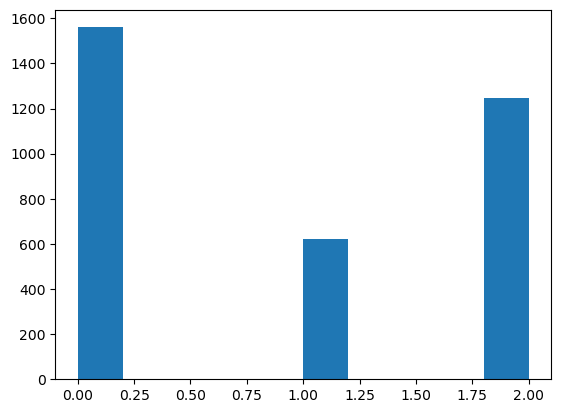

In [18]:
plt.hist(df['species'])

<Figure size 1200x700 with 0 Axes>

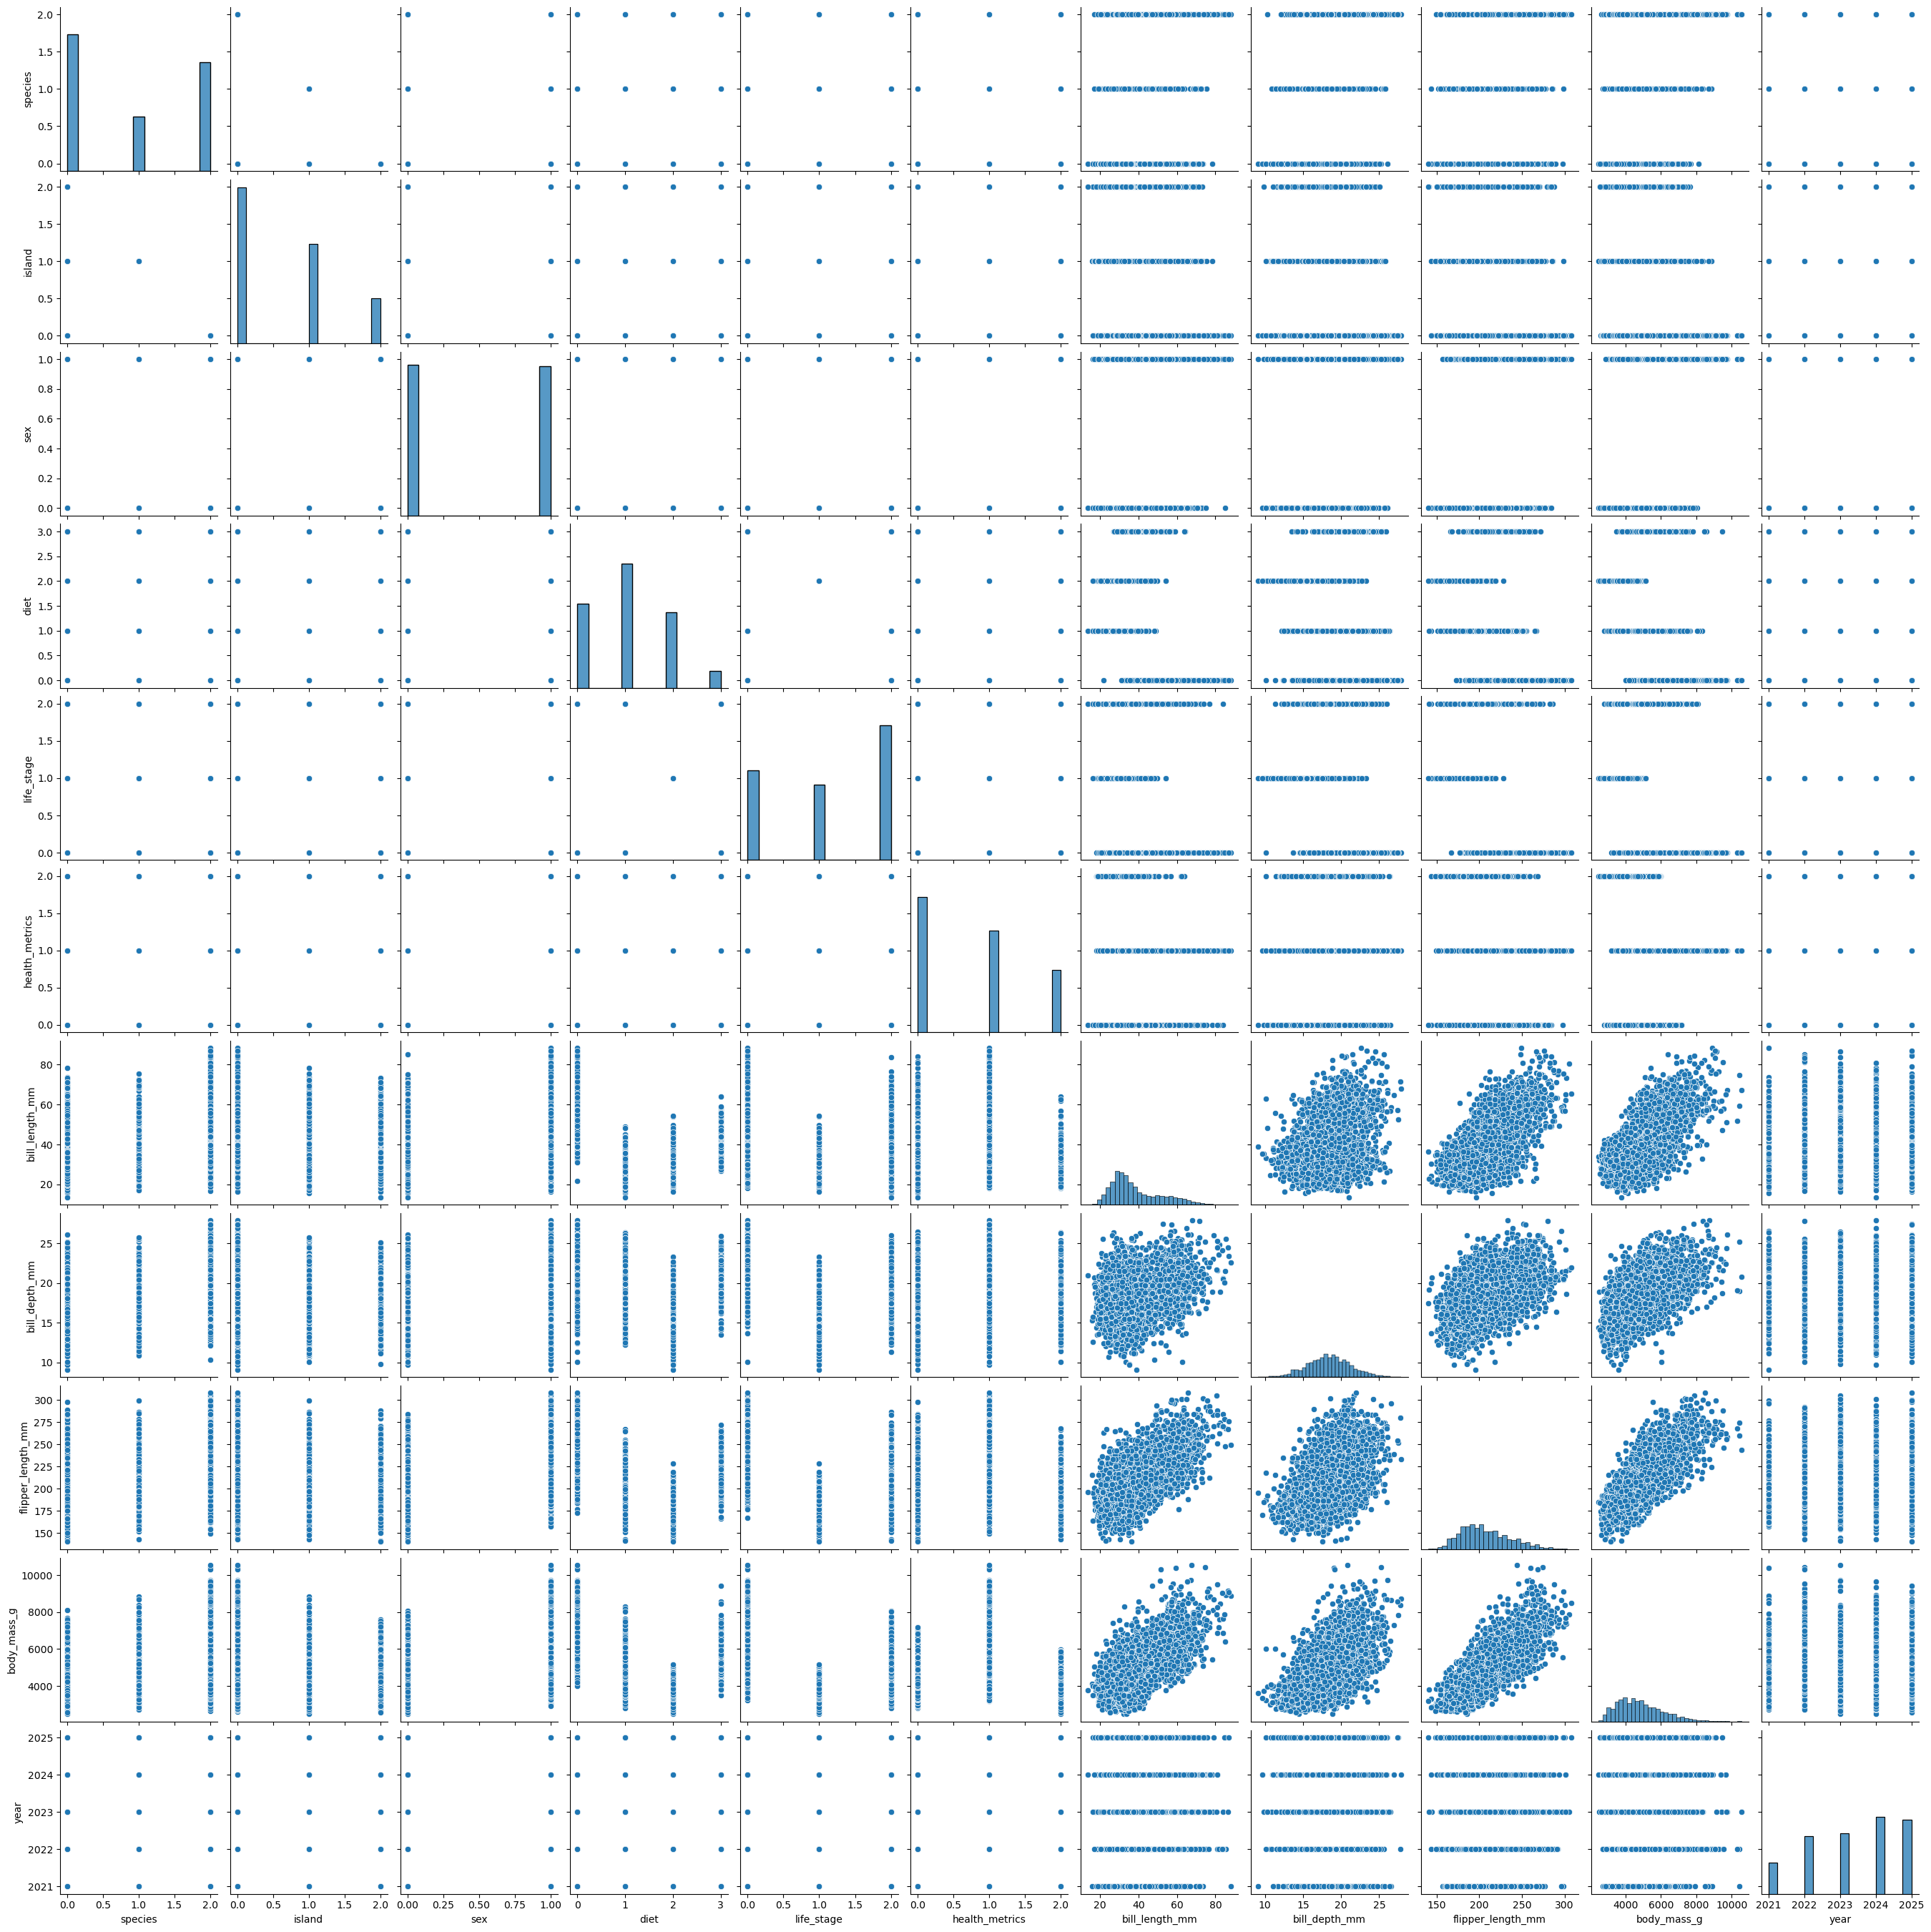

In [19]:
plt.figure(figsize=(12,7))
sns.pairplot(df)

<Axes: >

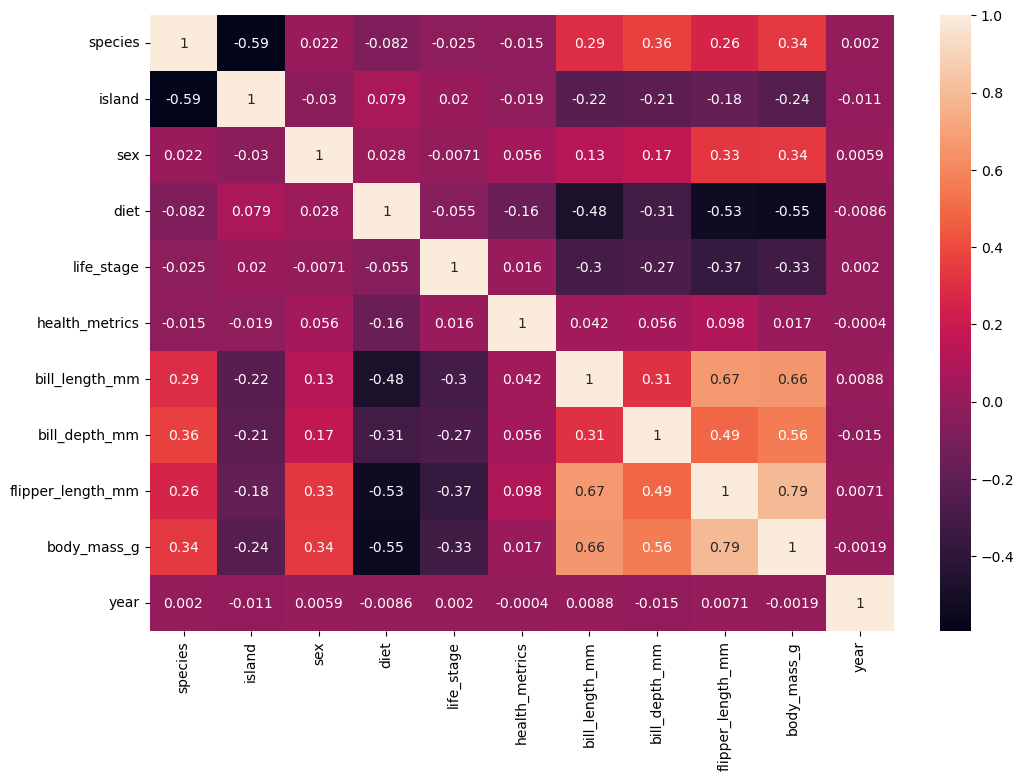

In [20]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

<Axes: >

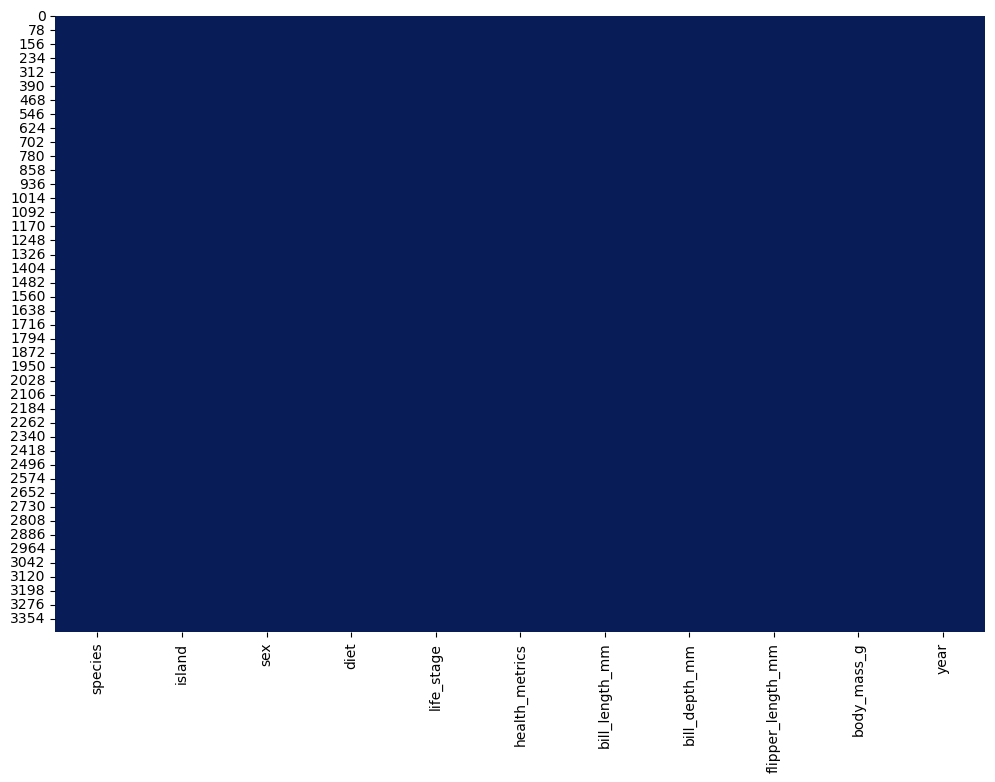

In [21]:
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull(),cmap='YlGnBu_r',cbar=False)

array([9.99755891e-01, 1.89238745e-04])

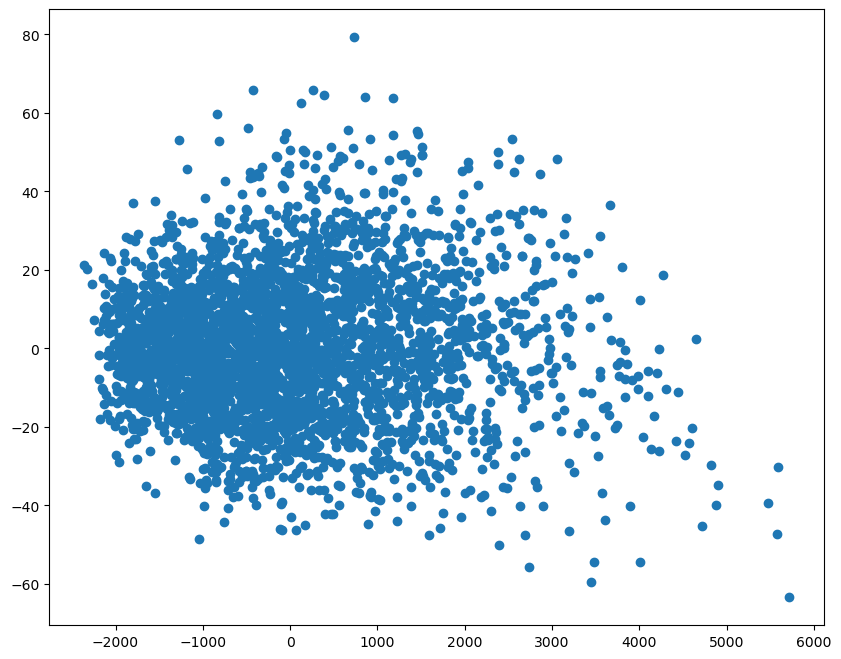

In [22]:
from sklearn.decomposition import PCA
decom = PCA(2)
df_pca = decom.fit_transform(df)
fig = plt.figure(figsize=(10,8))
plt.scatter(df_pca.T[0],df_pca.T[1])
decom.explained_variance_ratio_

In [23]:
df_pca

array([[ 8.52447477e+02, -6.82908876e-01],
       [ 1.97667765e+03,  2.72753602e+00],
       [ 5.53636344e+02,  1.22033592e+01],
       ...,
       [ 2.57481602e+03,  4.74715639e+00],
       [ 1.65681507e+03,  1.21731929e+01],
       [ 1.99996063e+03, -3.68560528e+01]])

In [24]:
df_pca.T[0].max()

5714.126859457073

In [25]:
df_pca.T[1].max()

79.24758397041107

In [26]:
df.describe().T

count         mean          std     min     25%     50%  \
species            3430.0     0.908746     0.900154     0.0     0.0     1.0   
island             3430.0     0.628863     0.729446     0.0     0.0     0.0   
sex                3430.0     0.496793     0.500063     0.0     0.0     0.0   
diet               3430.0     1.083965     0.865026     0.0     0.0     1.0   
life_stage         3430.0     1.149271     0.852761     0.0     0.0     1.0   
health_metrics     3430.0     0.755977     0.774851     0.0     0.0     1.0   
bill_length_mm     3430.0    38.529825    13.175171    13.6    28.9    34.5   
bill_depth_mm      3430.0    18.447143     2.774428     9.1    16.6    18.4   
flipper_length_mm  3430.0   207.028863    28.944765   140.0   185.0   203.0   
body_mass_g        3430.0  4834.710496  1311.091310  2477.0  3843.5  4633.5   
year               3430.0  2023.348397     1.313797  2021.0  2022.0  2024.0   

                      75%      max  
species               2.0      2.0  
island                1.0      2.0  
sex                   1.0      1.0  
diet                  2.0      3.0  
life_stage            2.0      2.0  
health_metrics        1.0      2.0  
bill_length_mm       46.6     88.2  
bill_depth_mm        20.3     27.9  
flipper_length_mm   226.0    308.0  
body_mass_g        5622.0  10549.0  
year               2024.0   2025.0

In [27]:
df.loc[np.where(df_pca.T[0]>3000)]

species  island  sex  diet  life_stage  health_metrics  bill_length_mm  \
262       2.0     0.0  1.0   0.0         0.0             1.0            53.2   
267       2.0     0.0  1.0   0.0         0.0             1.0            88.2   
268       2.0     0.0  1.0   0.0         0.0             1.0            71.5   
269       2.0     0.0  1.0   0.0         0.0             1.0            58.5   
270       2.0     0.0  1.0   0.0         0.0             1.0            60.8   
...       ...     ...  ...   ...         ...             ...             ...   
3208      2.0     0.0  1.0   0.0         0.0             1.0            65.6   
3210      2.0     0.0  1.0   0.0         0.0             1.0            71.4   
3211      2.0     0.0  1.0   0.0         0.0             1.0            57.3   
3328      2.0     0.0  1.0   1.0         0.0             1.0            39.6   
3423      2.0     0.0  1.0   3.0         0.0             1.0            47.2   

      bill_depth_mm  flipper_length_mm  body_mass_g  year  
262            24.3              270.0       8754.0  2021  
267            22.6              249.0       8873.0  2021  
268            24.0              267.0       7926.0  2021  
269            26.6              296.0       8635.0  2021  
270            22.9              254.0       8489.0  2021  
...             ...                ...          ...   ...  
3208           22.0              308.0       8494.0  2025  
3210           20.9              250.0       7836.0  2025  
3211           27.4              254.0       8585.0  2025  
3328           19.9              220.0       8032.0  2025  
3423           18.7              272.0       9440.0  2025  

[90 rows x 11 columns]

In [28]:
df.loc[np.where(df_pca.T[0]>3000)][object_cols]

species  island  sex  diet  life_stage  health_metrics
262       2.0     0.0  1.0   0.0         0.0             1.0
267       2.0     0.0  1.0   0.0         0.0             1.0
268       2.0     0.0  1.0   0.0         0.0             1.0
269       2.0     0.0  1.0   0.0         0.0             1.0
270       2.0     0.0  1.0   0.0         0.0             1.0
...       ...     ...  ...   ...         ...             ...
3208      2.0     0.0  1.0   0.0         0.0             1.0
3210      2.0     0.0  1.0   0.0         0.0             1.0
3211      2.0     0.0  1.0   0.0         0.0             1.0
3328      2.0     0.0  1.0   1.0         0.0             1.0
3423      2.0     0.0  1.0   3.0         0.0             1.0

[90 rows x 6 columns]

In [29]:
df_obj = pd.DataFrame(enc.inverse_transform(np.array(df.loc[np.where(df_pca.T[0]>3000)][object_cols])))
df_num = df.loc[np.where(df_pca.T[0]>3000)][num_cols].reset_index(drop=True)
show_data = pd.concat([df_obj,df_num],axis=1)
show_data.columns = object_cols + num_cols
show_data

species  island   sex   diet life_stage health_metrics  bill_length_mm  \
0   Gentoo  Biscoe  male   fish      adult     overweight            53.2   
1   Gentoo  Biscoe  male   fish      adult     overweight            88.2   
2   Gentoo  Biscoe  male   fish      adult     overweight            71.5   
3   Gentoo  Biscoe  male   fish      adult     overweight            58.5   
4   Gentoo  Biscoe  male   fish      adult     overweight            60.8   
..     ...     ...   ...    ...        ...            ...             ...   
85  Gentoo  Biscoe  male   fish      adult     overweight            65.6   
86  Gentoo  Biscoe  male   fish      adult     overweight            71.4   
87  Gentoo  Biscoe  male   fish      adult     overweight            57.3   
88  Gentoo  Biscoe  male  krill      adult     overweight            39.6   
89  Gentoo  Biscoe  male  squid      adult     overweight            47.2   

    bill_depth_mm  flipper_length_mm  body_mass_g  year  
0            24.3              270.0       8754.0  2021  
1            22.6              249.0       8873.0  2021  
2            24.0              267.0       7926.0  2021  
3            26.6              296.0       8635.0  2021  
4            22.9              254.0       8489.0  2021  
..            ...                ...          ...   ...  
85           22.0              308.0       8494.0  2025  
86           20.9              250.0       7836.0  2025  
87           27.4              254.0       8585.0  2025  
88           19.9              220.0       8032.0  2025  
89           18.7              272.0       9440.0  2025  

[90 rows x 11 columns]

In [30]:
df.loc[np.where(df_pca.T[1]>60)[0]]

species  island  sex  diet  life_stage  health_metrics  bill_length_mm  \
156       0.0     2.0  1.0   3.0         0.0             2.0            41.1   
815       2.0     0.0  0.0   0.0         0.0             0.0            65.4   
1347      1.0     1.0  1.0   0.0         2.0             1.0            51.8   
1545      2.0     0.0  1.0   0.0         0.0             2.0            61.8   
2611      0.0     0.0  1.0   0.0         0.0             0.0            56.8   
2612      0.0     0.0  1.0   0.0         0.0             1.0            63.4   
3107      2.0     0.0  0.0   0.0         0.0             0.0            54.0   

      bill_depth_mm  flipper_length_mm  body_mass_g  year  
156            21.5              266.0       4414.0  2021  
815            21.2              273.0       5090.0  2022  
1347           20.7              286.0       5693.0  2023  
1545           20.0              268.0       4960.0  2023  
2611           20.6              298.0       5560.0  2025  
2612           20.8              289.0       6008.0  2025  
3107           20.5              277.0       5219.0  2025

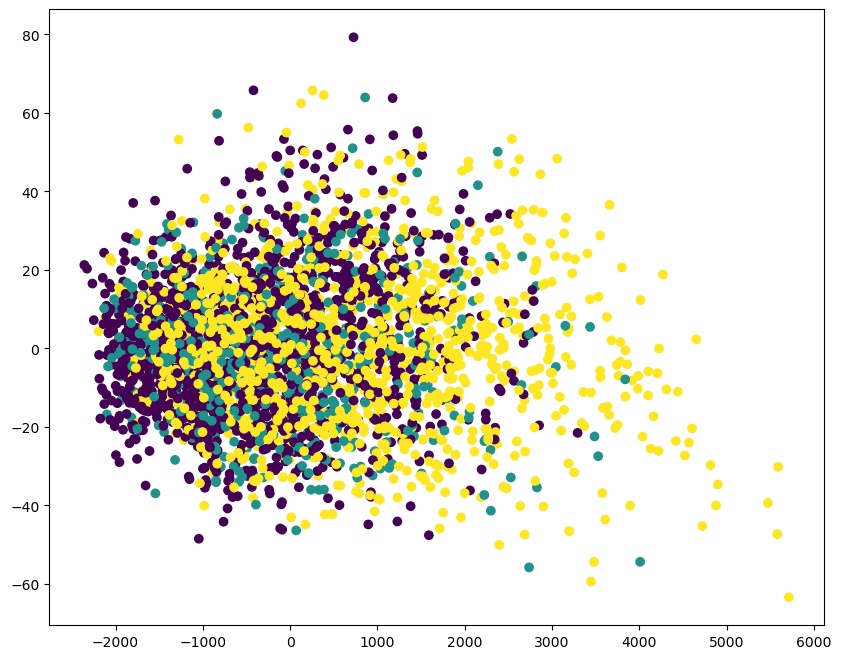

In [31]:
decom = PCA(2)
df_pca = decom.fit_transform(df)
fig = plt.figure(figsize=(10,8))
plt.scatter(df_pca.T[0],df_pca.T[1],c=df['species'])

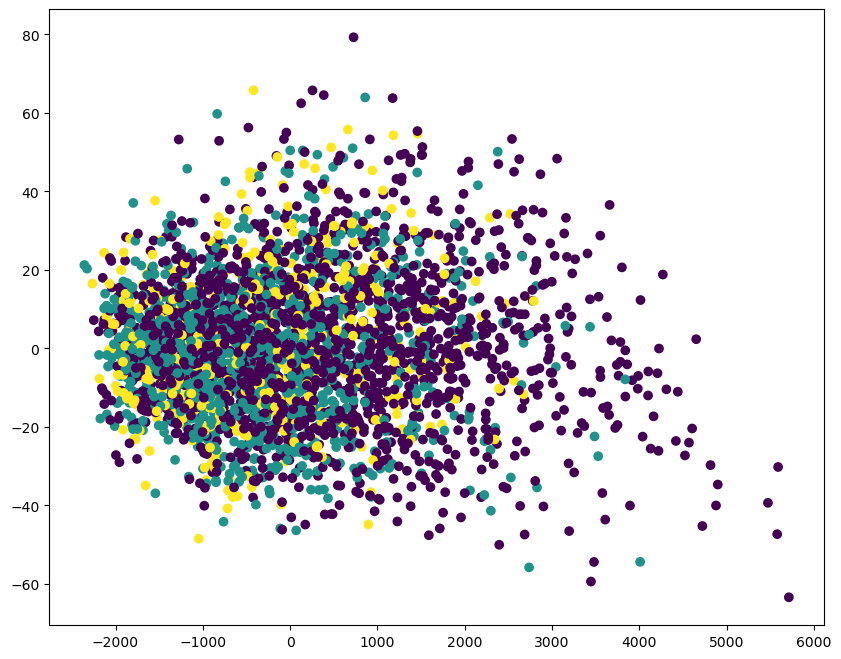

In [32]:
decom = PCA(2)
df_pca = decom.fit_transform(df)
fig = plt.figure(figsize=(10,8))
plt.scatter(df_pca.T[0],df_pca.T[1],c=df['island'])

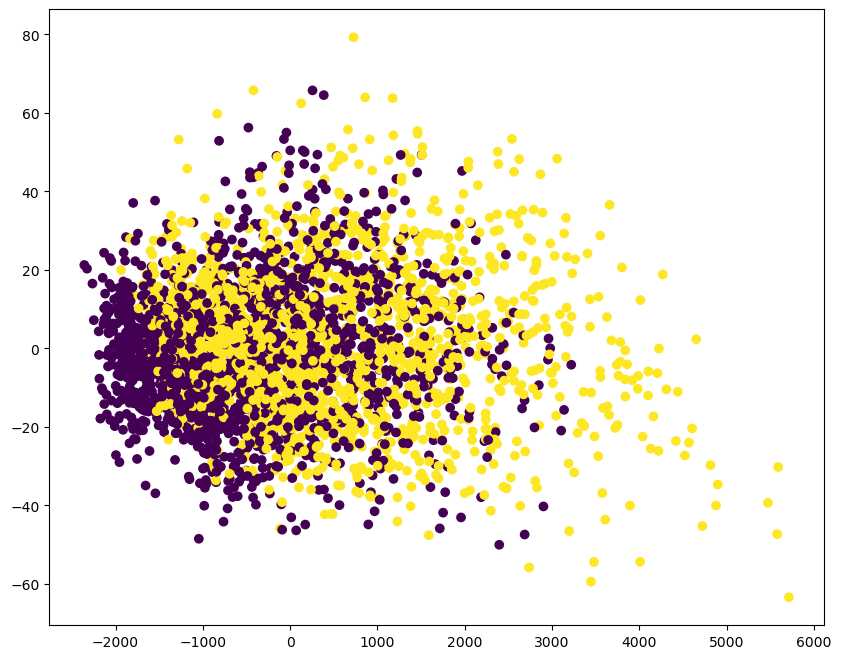

In [33]:
decom = PCA(2)
df_pca = decom.fit_transform(df)
fig = plt.figure(figsize=(10,8))
plt.scatter(df_pca.T[0],df_pca.T[1],c=df['sex'])

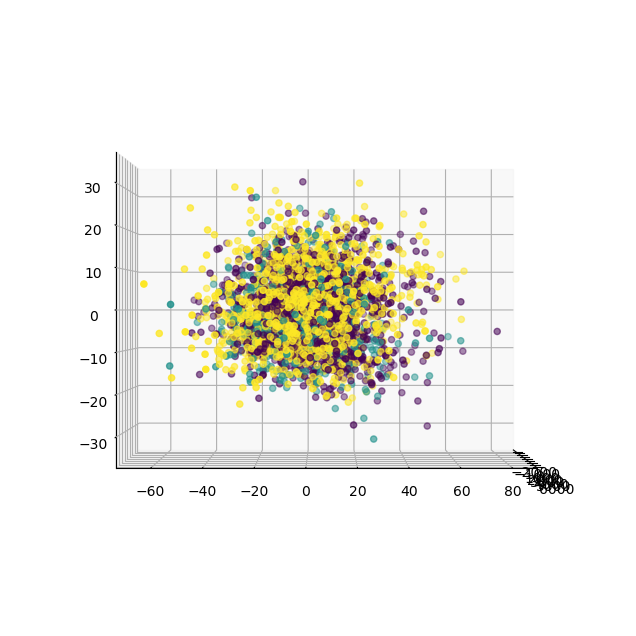

In [34]:
decom = PCA(3)
df_pca = decom.fit_transform(df)
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_pca.T[0],df_pca.T[1],df_pca.T[2],c=df['species'])
ax.view_init(0, 0, 0)

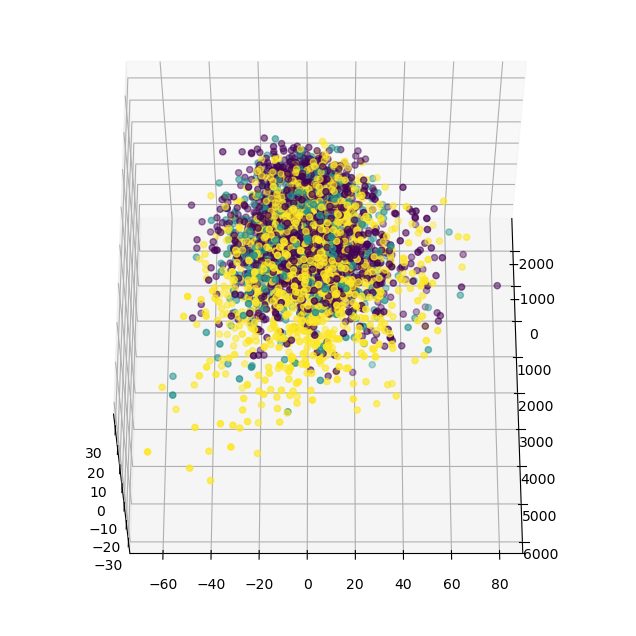

In [35]:
decom = PCA(3)
df_pca = decom.fit_transform(df)
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(df_pca.T[0],df_pca.T[1],df_pca.T[2],c=df['species'])
ax.view_init(60, 0, 0)

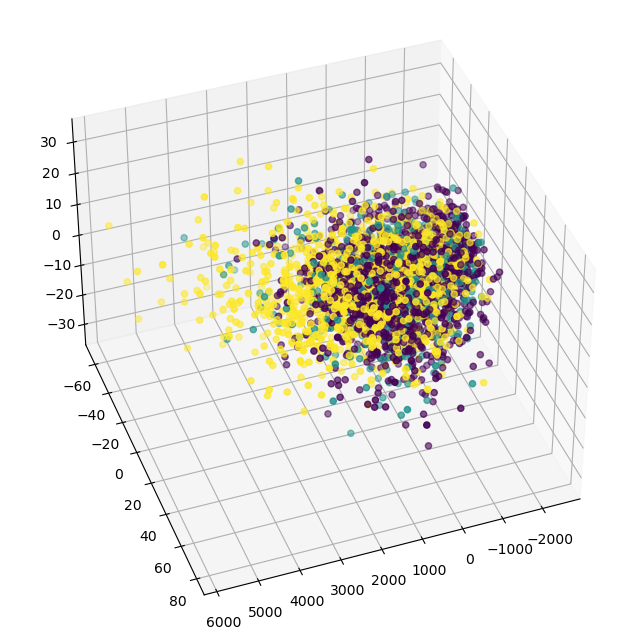

In [36]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(df_pca.T[0],df_pca.T[1],df_pca.T[2],c=df['species'])
ax.view_init(40,70,0)

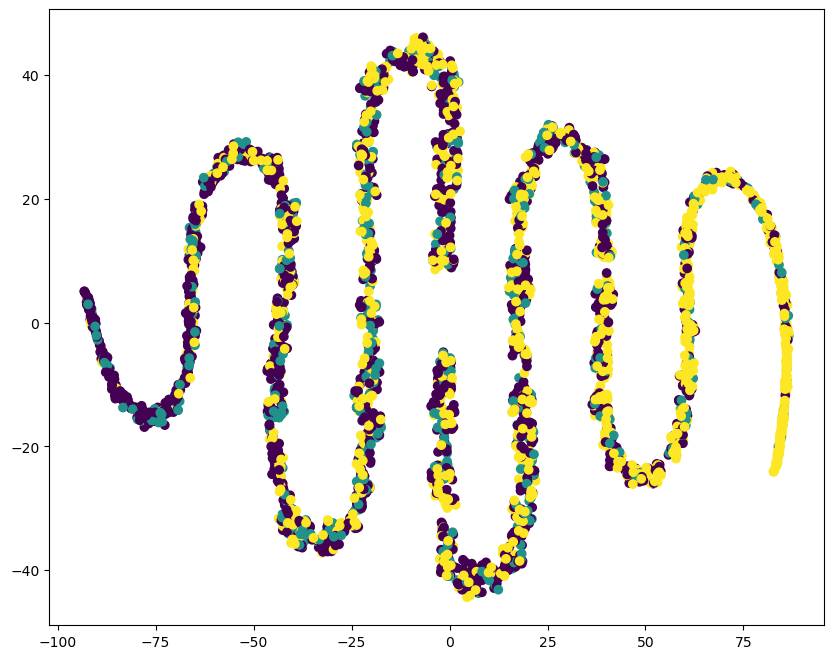

In [37]:
decom = TSNE(2)
df_pca = decom.fit_transform(df)
fig = plt.figure(figsize=(10,8))
plt.scatter(df_pca.T[0],df_pca.T[1],c=df['species'])

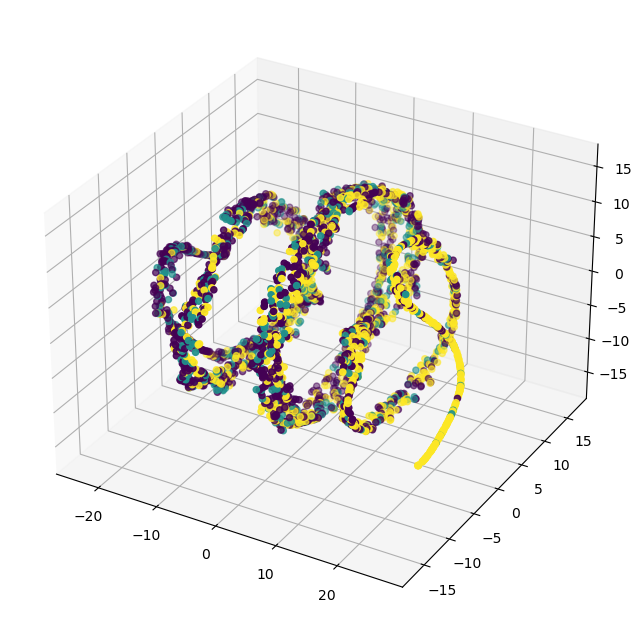

In [38]:
decom = TSNE(3)
df_pca = decom.fit_transform(df)
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(df_pca.T[0],df_pca.T[1],df_pca.T[2],c=df['species'])

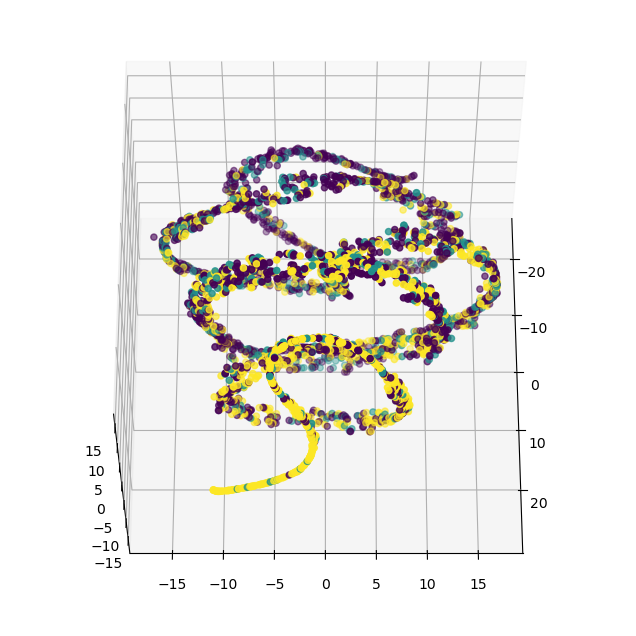

In [39]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(df_pca.T[0],df_pca.T[1],df_pca.T[2],c=df['species'])
ax.view_init(60,0,0)

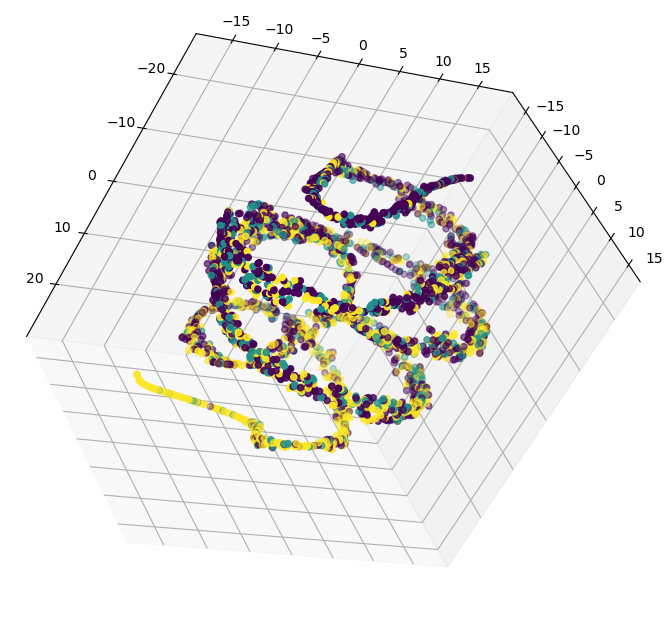

In [40]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(df_pca.T[0],df_pca.T[1],df_pca.T[2],c=df['species'])
ax.view_init(140,50,30)

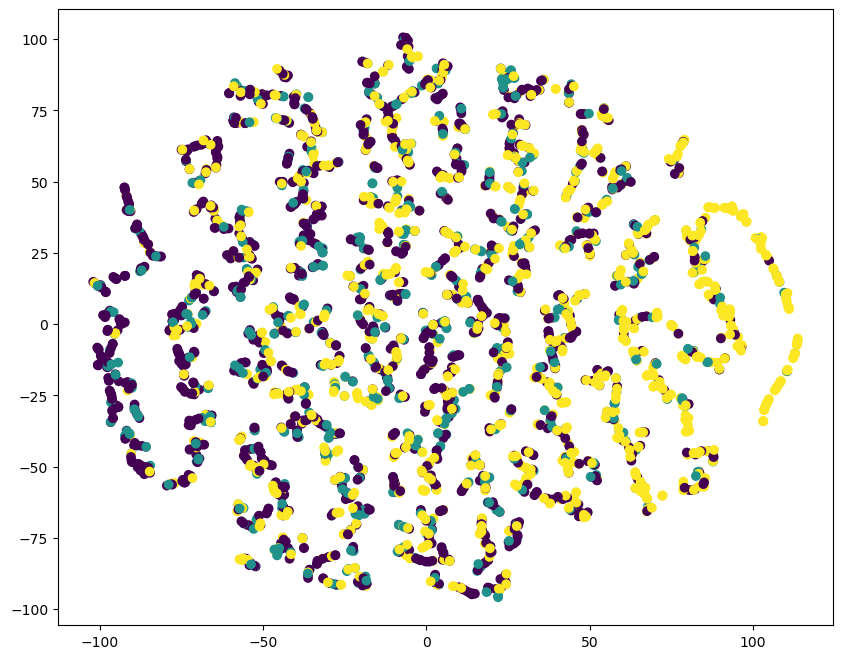

In [41]:
decom = TSNE(2,perplexity=5)
df_pca = decom.fit_transform(df)
fig = plt.figure(figsize=(10,8))
plt.scatter(df_pca.T[0],df_pca.T[1],c=df['species'])

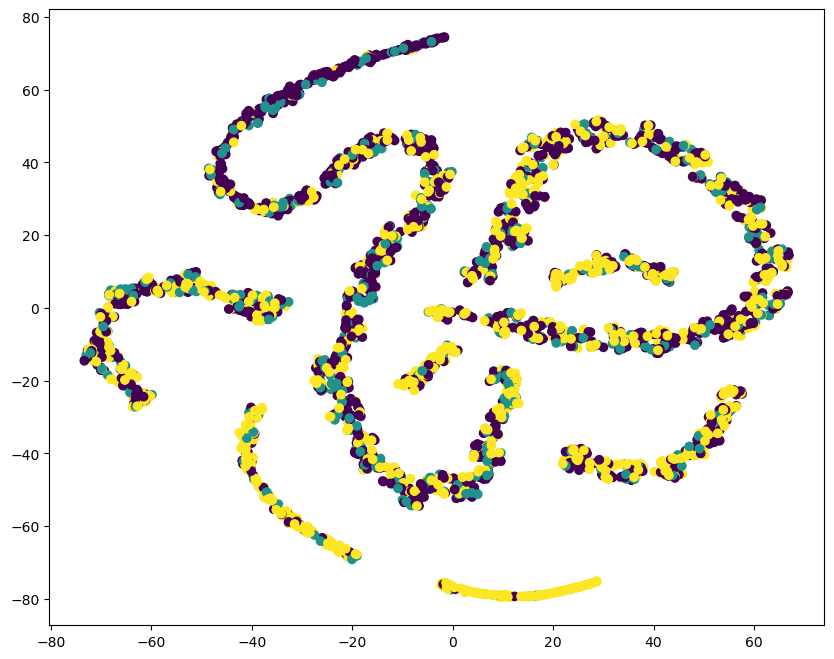

In [42]:
decom = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=20)
df_pca = decom.fit_transform(df)
fig = plt.figure(figsize=(10,8))
plt.scatter(df_pca.T[0],df_pca.T[1],c=df['species'])

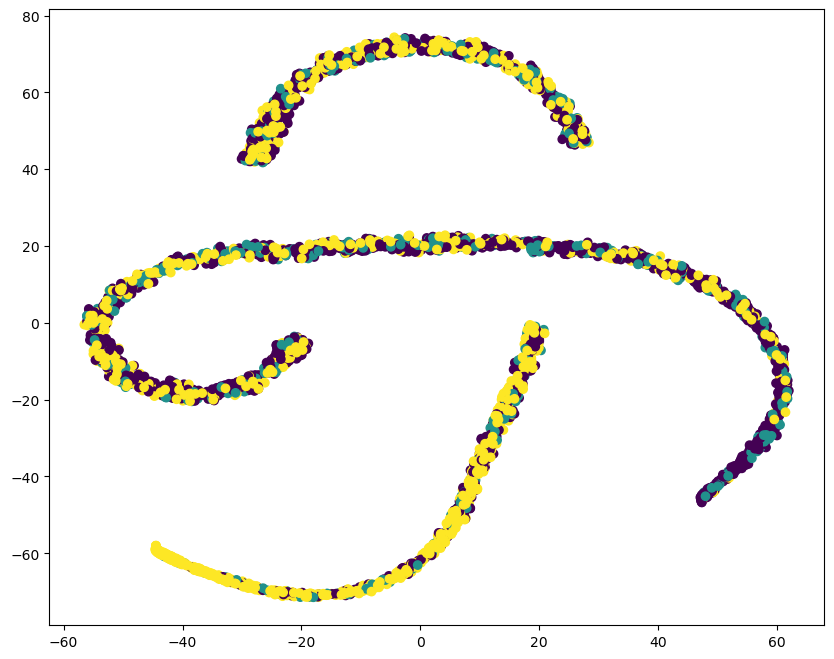

In [43]:
decom = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=50,n_iter=5000)
df_pca = decom.fit_transform(df)
fig = plt.figure(figsize=(10,8))
plt.scatter(df_pca.T[0],df_pca.T[1],c=df['species'])

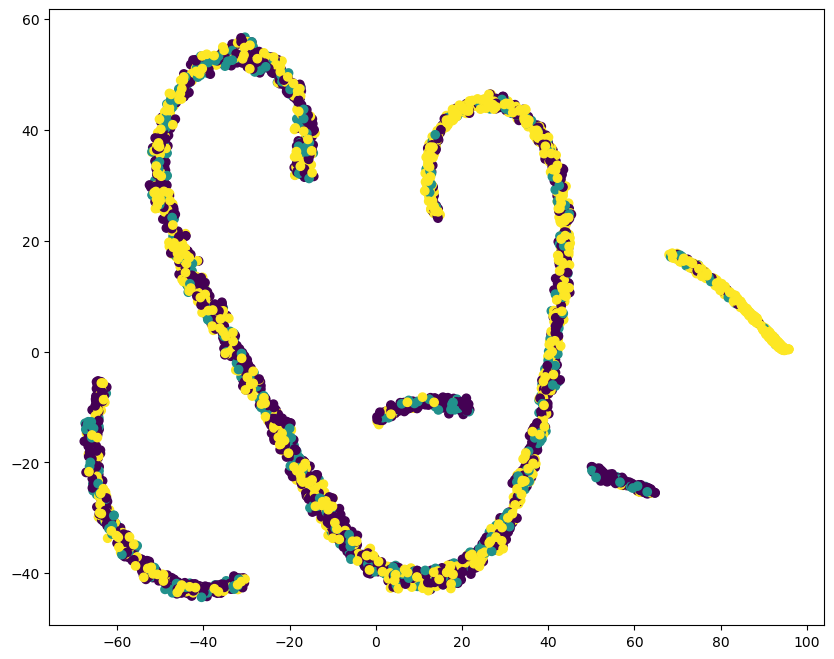

In [44]:
decom = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=50,n_iter=5000)
df_pca = decom.fit_transform(df)
fig = plt.figure(figsize=(10,8))
plt.scatter(df_pca.T[0],df_pca.T[1],c=df['species'])

https://distill.pub/2016/misread-tsne/

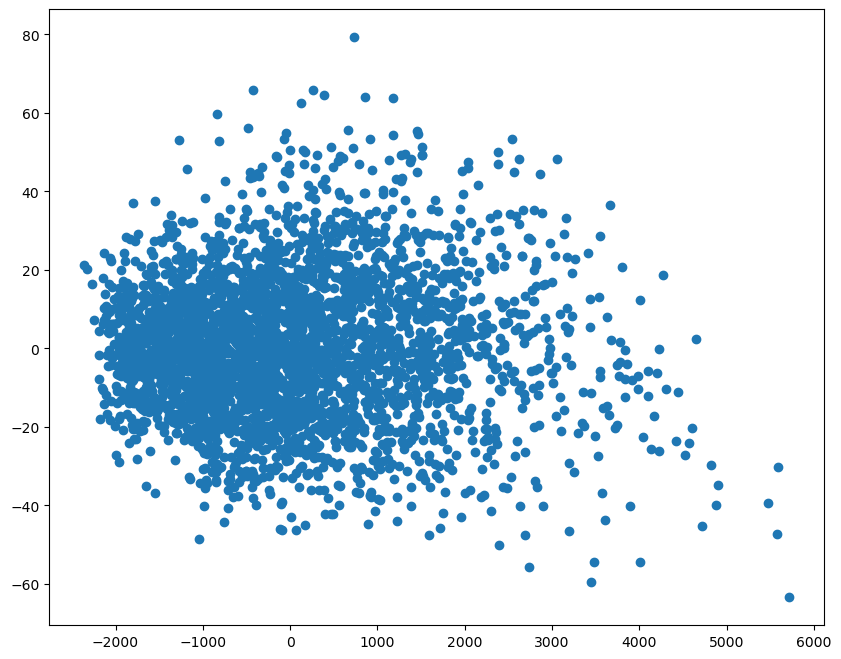

In [45]:
from sklearn.decomposition import PCA
decom = PCA(2)
df_pca = decom.fit_transform(df)
fig = plt.figure(figsize=(10,8))
plt.scatter(df_pca.T[0],df_pca.T[1])

In [46]:
df

species  island  sex  diet  life_stage  health_metrics  bill_length_mm  \
0         0.0     0.0  0.0   0.0         0.0             1.0            53.4   
1         0.0     0.0  0.0   0.0         0.0             1.0            49.3   
2         0.0     0.0  0.0   0.0         0.0             1.0            55.7   
3         0.0     0.0  0.0   0.0         0.0             1.0            38.0   
4         0.0     0.0  0.0   0.0         2.0             1.0            60.7   
...       ...     ...  ...   ...         ...             ...             ...   
3425      2.0     0.0  1.0   3.0         0.0             0.0            44.0   
3426      2.0     0.0  1.0   3.0         0.0             0.0            54.5   
3427      2.0     0.0  1.0   3.0         0.0             1.0            51.4   
3428      2.0     0.0  1.0   3.0         0.0             0.0            55.9   
3429      2.0     0.0  1.0   3.0         0.0             0.0            43.9   

      bill_depth_mm  flipper_length_mm  body_mass_g  year  
0              17.8              219.0       5687.0  2021  
1              18.1              245.0       6811.0  2021  
2              16.6              226.0       5388.0  2021  
3              15.6              221.0       6262.0  2021  
4              17.9              177.0       4811.0  2021  
...             ...                ...          ...   ...  
3425           20.4              252.0       6447.0  2025  
3426           25.2              245.0       6872.0  2025  
3427           20.4              258.0       7409.0  2025  
3428           20.5              247.0       6491.0  2025  
3429           22.9              206.0       6835.0  2025  

[3430 rows x 11 columns]

In [47]:
df.drop(columns='species',inplace=True)
df

island  sex  diet  life_stage  health_metrics  bill_length_mm  \
0        0.0  0.0   0.0         0.0             1.0            53.4   
1        0.0  0.0   0.0         0.0             1.0            49.3   
2        0.0  0.0   0.0         0.0             1.0            55.7   
3        0.0  0.0   0.0         0.0             1.0            38.0   
4        0.0  0.0   0.0         2.0             1.0            60.7   
...      ...  ...   ...         ...             ...             ...   
3425     0.0  1.0   3.0         0.0             0.0            44.0   
3426     0.0  1.0   3.0         0.0             0.0            54.5   
3427     0.0  1.0   3.0         0.0             1.0            51.4   
3428     0.0  1.0   3.0         0.0             0.0            55.9   
3429     0.0  1.0   3.0         0.0             0.0            43.9   

      bill_depth_mm  flipper_length_mm  body_mass_g  year  
0              17.8              219.0       5687.0  2021  
1              18.1              245.0       6811.0  2021  
2              16.6              226.0       5388.0  2021  
3              15.6              221.0       6262.0  2021  
4              17.9              177.0       4811.0  2021  
...             ...                ...          ...   ...  
3425           20.4              252.0       6447.0  2025  
3426           25.2              245.0       6872.0  2025  
3427           20.4              258.0       7409.0  2025  
3428           20.5              247.0       6491.0  2025  
3429           22.9              206.0       6835.0  2025  

[3430 rows x 10 columns]

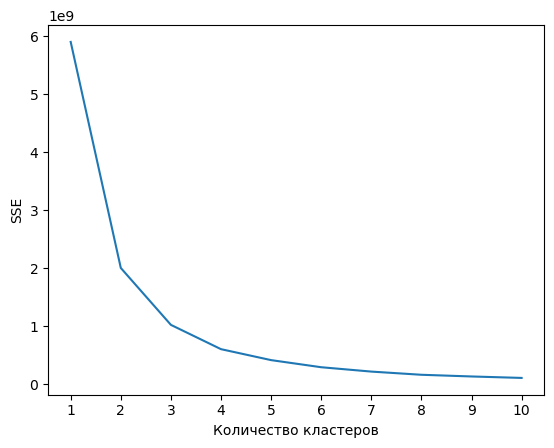

In [59]:
from sklearn.cluster import KMeans
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"random_state": 1,
}
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Количество кластеров")
plt.ylabel("SSE")
plt.show()

inertia_ \
Sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided. \
Сумма квадратов расстояний выборок до их ближайшего центра кластера, взвешенных по весам выборок, если они указаны.

In [58]:
sse

[5897825438.467815,
 2003066947.8806598,
 1022282833.2331929,
 603571246.3860642,
 414809066.2601916,
 292285356.5713593,
 217104685.45144567,
 162264081.4420625,
 133070619.9017457,
 108011279.19029988]

In [62]:
kmeans = KMeans(init="random", n_clusters=4, random_state=1)

kmeans.fit(df)

E:\hran\anacondaz\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(init='random', n_clusters=4, random_state=1)

In [65]:
kmeans.labels_

array([1, 1, 1, ..., 3, 1, 1])

In [66]:
df

island  sex  diet  life_stage  health_metrics  bill_length_mm  \
0        0.0  0.0   0.0         0.0             1.0            53.4   
1        0.0  0.0   0.0         0.0             1.0            49.3   
2        0.0  0.0   0.0         0.0             1.0            55.7   
3        0.0  0.0   0.0         0.0             1.0            38.0   
4        0.0  0.0   0.0         2.0             1.0            60.7   
...      ...  ...   ...         ...             ...             ...   
3425     0.0  1.0   3.0         0.0             0.0            44.0   
3426     0.0  1.0   3.0         0.0             0.0            54.5   
3427     0.0  1.0   3.0         0.0             1.0            51.4   
3428     0.0  1.0   3.0         0.0             0.0            55.9   
3429     0.0  1.0   3.0         0.0             0.0            43.9   

      bill_depth_mm  flipper_length_mm  body_mass_g  year  
0              17.8              219.0       5687.0  2021  
1              18.1              245.0       6811.0  2021  
2              16.6              226.0       5388.0  2021  
3              15.6              221.0       6262.0  2021  
4              17.9              177.0       4811.0  2021  
...             ...                ...          ...   ...  
3425           20.4              252.0       6447.0  2025  
3426           25.2              245.0       6872.0  2025  
3427           20.4              258.0       7409.0  2025  
3428           20.5              247.0       6491.0  2025  
3429           22.9              206.0       6835.0  2025  

[3430 rows x 10 columns]

In [71]:
df['label'] = kmeans.labels_
df

island  sex  diet  life_stage  health_metrics  bill_length_mm  \
0        0.0  0.0   0.0         0.0             1.0            53.4   
1        0.0  0.0   0.0         0.0             1.0            49.3   
2        0.0  0.0   0.0         0.0             1.0            55.7   
3        0.0  0.0   0.0         0.0             1.0            38.0   
4        0.0  0.0   0.0         2.0             1.0            60.7   
...      ...  ...   ...         ...             ...             ...   
3425     0.0  1.0   3.0         0.0             0.0            44.0   
3426     0.0  1.0   3.0         0.0             0.0            54.5   
3427     0.0  1.0   3.0         0.0             1.0            51.4   
3428     0.0  1.0   3.0         0.0             0.0            55.9   
3429     0.0  1.0   3.0         0.0             0.0            43.9   

      bill_depth_mm  flipper_length_mm  body_mass_g  year  label  
0              17.8              219.0       5687.0  2021      1  
1              18.1              245.0       6811.0  2021      1  
2              16.6              226.0       5388.0  2021      1  
3              15.6              221.0       6262.0  2021      1  
4              17.9              177.0       4811.0  2021      2  
...             ...                ...          ...   ...    ...  
3425           20.4              252.0       6447.0  2025      1  
3426           25.2              245.0       6872.0  2025      1  
3427           20.4              258.0       7409.0  2025      3  
3428           20.5              247.0       6491.0  2025      1  
3429           22.9              206.0       6835.0  2025      1  

[3430 rows x 11 columns]

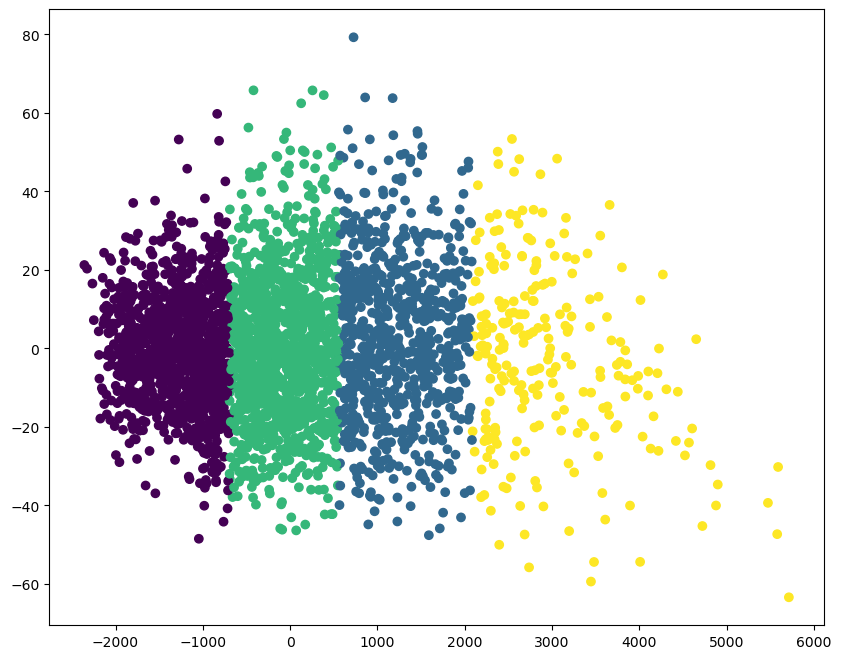

In [72]:
decom = PCA(2)
df_pca = decom.fit_transform(df.drop(columns='label'))
fig = plt.figure(figsize=(10,8))
plt.scatter(df_pca.T[0],df_pca.T[1],c=df['label'])